<a href="https://colab.research.google.com/github/Akshat-Vision/Style-Swap/blob/main/StyleSwap_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries and functions

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Mounting my Google Drive into the colab environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the RGB image as input and converting to grayscale

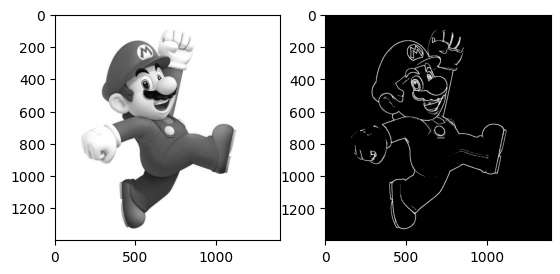

In [ ]:
file_path='/content/drive/My Drive/mario.png'
img=cv2.imread(file_path)

#img=img[20:230,60:260]
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


Function definition to convolve two matrices

In [ ]:
def convolve1(a,b):
  return a[0]*b[0]+a[1]*b[1]+a[2]*b[2]

def convolve2(img, kernel):
  M,N=img.shape
  map=np.zeros((M,N))
  pad=np.zeros((M+1,N+1))

  for i in range(M+1):
    for j in range(N+1):
      if(i*j!=0):
        pad[i,j]=img[i-1,j-1]

  for i in range(M-1):
    for j in range(N-1):
      map[i,j]=convolve1(pad[i:i+3,j-1],kernel[0,:]) + convolve1(pad[i:i+3,j],kernel[1,:]) + convolve1(pad[i:i+3,j+1],kernel[2,:])

  return map

Defining all the kernels(filters) to be used (Sobel, Scharr, Prewitt, Gaussian, Laplacian)

In [ ]:
sobelx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobely=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
scharrx=np.array([[3,0,-3],[10,0,-10],[3,0,-3]])
scharry=np.array([[3,10,3],[0,0,0],[-3,-10,-3]])
prewittx=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitty=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
gauss=np.array([[1,2,1],[2,4,2],[1,2,1]])/16
laplac=np.array([[0,1,0],[1,-4,1],[0,1,0]])

Gaussian filter + Convolution with Sobel kernel

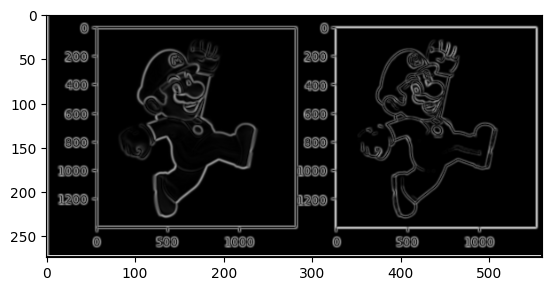

In [ ]:
def gauss_sobel(img):
  img=convolve2(img,gauss)              #Convolution with Gaussian kernel smoothens out the grayscale image, reducing noise
  gradx=convolve2(img,sobelx)           #Convolution with Sobel-x kernel, giving gradient map along the x axis
  grady=convolve2(img,sobely)           #Convolution with Sobel-y kernel, giving gradient map along the y axis
  grad=np.sqrt((gradx**2 + grady**2))   #Obtaining the overall gradient map
  plt.imshow(grad,cmap='gray')

gauss_sobel(gray)

Convolution with Sobel Kernel

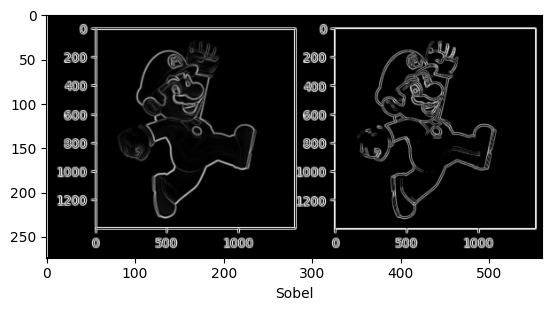

In [ ]:
def sobel(img):
  gradx=convolve2(img,sobelx)           #Convolution with Sobel-x kernel, giving gradient map along the x axis
  grady=convolve2(img,sobely)           #Convolution with Sobel-x kernel, giving gradient map along the x axis
  grad=np.sqrt((gradx**2 + grady**2))   #Obtaining the overall gradient map
  plt.imshow(grad,cmap='gray')
  plt.xlabel('Sobel')

sobel(gray)

Convolution with Scharr Kernel

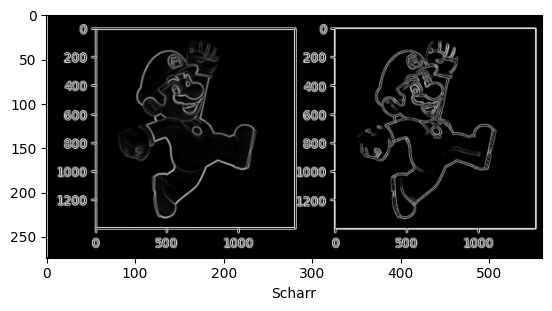

In [ ]:
def scharr(img):
  gradx=convolve2(img,scharrx)          #Convolution with Scharr-x kernel, giving gradient map along the x axis
  grady=convolve2(img,scharry)          #Convolution with Scharr-y kernel, giving gradient map along the y axis
  grad=np.sqrt((gradx**2 + grady**2))   #Obtaining the overall gradient map
  plt.imshow(grad,cmap='gray')
  plt.xlabel('Scharr')
scharr(gray)

Convolution with Prewitt Kernel

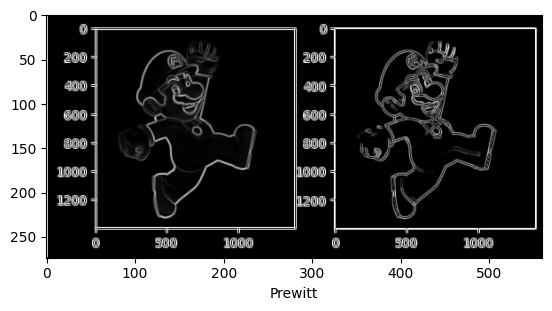

In [ ]:
def prewitt(img):
  gradx=convolve2(img,prewittx)         #Convolution with Prewitt-x kernel, giving gradient map along the x axis
  grady=convolve2(img,prewitty)         #Convolution with Prewitt-y kernel, giving gradient map along the y axis
  grad=np.sqrt((gradx**2 + grady**2))   #Obtaining the overall gradient map
  plt.imshow(grad,cmap='gray')
  plt.xlabel('Prewitt')
prewitt(gray)

Canny edge detection algorithm

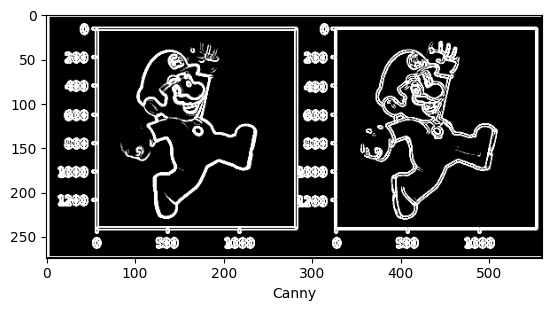

In [ ]:
def canny(img):
  img=convolve2(img,gauss)                                #Convolution with Gaussian kernel smoothens out the grayscale image, reducing noise
  gradx=convolve2(img,sobelx)                             #Convolution with Sobel-x kernel, giving gradient map along the x axis
  grady=convolve2(img,sobely)                             #Convolution with Sobel-y kernel, giving gradient map along the y axis
  grad=np.sqrt((gradx**2 + grady**2))                     #Obtaining the overall gradient map


  M,N=np.shape(img)
  m=np.zeros_like(img)                                    #Initializing the edge map
  angle=np.zeros_like(img)                                #Initializing the angle matrix

  for i in range(M-1):
    for j in range(N-1):

      if(gradx[i,j]==0):
        angle[i,j]=90

      else:
        angle[i,j]=(grady[i,j]/gradx[i,j])*180/np.pi      #Obtaining the direction of gradient at each pixel, in degrees from x-axis



  angle[angle<0]+=180                                     #Ensuring nonnegative angle values


  #Non-maximum suppression :-
  for i in range(M-1):
    for j in range(N-1):

      try:
        q=255
        r=255


        if (0<=angle[i,j]<22.5) or (157.5<angle[i,j]<=180):
          q=grad[i,j+1]
          r=grad[i,j-1]

        elif (22.5<=angle[i,j]<67.5):
          q=grad[i+1,j-1]
          r=grad[i-1,j+1]

        elif (67.5<=angle[i,j]<112.5):
          q=grad[i+1,j]
          r=grad[i-1,j]

        elif(112.5<=angle[i,j]<157.5):
          q=grad[i-1,j-1]
          r=grad[i+1,j+1]


        if(grad[i,j]>=q) and (grad[i,j]>=r):
          m[i,j]=grad[i,j]

        else:
          m[i,j]=0

      except IndexError as e:
        pass


  highThresholdRatio=0.15
  lowThresholdRatio=0.1

  new=np.zeros((M,N))

  highThreshold=grad.max()*highThresholdRatio
  lowThreshold=grad.max()*lowThresholdRatio


  #Double Thresholding :-
  strong_i, strong_j=np.where((grad>=highThreshold))
  weak_i, weak_j=np.where((grad>=lowThreshold) & (grad<highThreshold))
  zeros_i,zeros_j=np.where((grad<lowThreshold))

  new[strong_i,strong_j]=5
  new[weak_i,weak_j]=2.5
  new[zeros_i,zeros_j]=0.5

  plt.imshow(new,cmap='gray')
  plt.xlabel('Canny')


  #Hysteresis tracking :-
  for i in range(M-1):
    for j in range(N-1):
      if(new[i,j]==2.5):
        try:
          if((new[i+1,j]==5) or (new[i,j+1]==5) or (new[i+1,j+1]==5) or (new[i-1,j]==5) or (new[i,j-1]==5) or (new[i-1,j-1]==5) or (new[i+1,j-1]==5) or (new[i-1,j+1]==5)):
            new[i,j]=5
          else:
            new[i,j]=0.5

        except IndexError as e:
          pass


canny(gray)

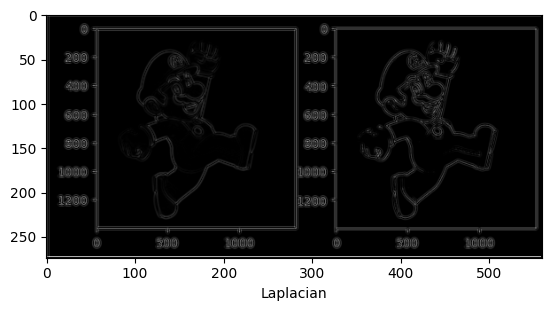

In [ ]:
def laplace(img):
  img=convolve2(img,gauss)                 #Convolution with Gaussian kernel smoothens out the grayscale image, reducing noise
  m=convolve2(img,laplac)                  #Obtaining the Laplacian of the grayscale image
  plt.imshow(np.absolute(m),cmap='gray')
  plt.xlabel('Laplacian')

laplace(gray)